In [215]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [216]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits', header=0)[0].reset_index(drop=True)

df.drop(columns=['Unnamed: 0', 'Date', '2011 Eurostatpopulation[1]', 'Image','Location', 'Ref.'], inplace=True)

df['Officialpopulation'] = pd.to_numeric(df['Officialpopulation'], errors='coerce')

df = df.dropna(subset=['Officialpopulation'])

df.reset_index(drop=True, inplace=True)

df            
       

,City,Country,Officialpopulation
0,Moscow[b],Russia,12195221.0
1,London,United Kingdom,9126366.0
2,Saint Petersburg,Russia,5383890.0
3,Berlin,Germany,3748148.0
4,Madrid,Spain,3223334.0
5,Kyiv,Ukraine,2950800.0
6,Rome,Italy,2844750.0
7,Paris,France,2140526.0
8,Minsk,Belarus,1982444.0
9,Vienna,Austria,1921153.0


In [217]:
df_top20 = df[0:21]
df_top20

,City,Country,Officialpopulation
0,Moscow[b],Russia,12195221.0
1,London,United Kingdom,9126366.0
2,Saint Petersburg,Russia,5383890.0
3,Berlin,Germany,3748148.0
4,Madrid,Spain,3223334.0
5,Kyiv,Ukraine,2950800.0
6,Rome,Italy,2844750.0
7,Paris,France,2140526.0
8,Minsk,Belarus,1982444.0
9,Vienna,Austria,1921153.0


In [218]:
df_top20['City'] = df_top20['City'].str.replace('[b]', '', regex=False)

#df_top20['City'] = df_top20['City'] + ' City Center'

#df_top20['City'] = df_top20['City'] + ', '+ df_top20['Country']

df_top20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,City,Country,Officialpopulation
0,Moscow,Russia,12195221.0
1,London,United Kingdom,9126366.0
2,Saint Petersburg,Russia,5383890.0
3,Berlin,Germany,3748148.0
4,Madrid,Spain,3223334.0
5,Kyiv,Ukraine,2950800.0
6,Rome,Italy,2844750.0
7,Paris,France,2140526.0
8,Minsk,Belarus,1982444.0
9,Vienna,Austria,1921153.0


In [219]:
geo_data = pd.read_csv(r"C:\Users\Cynny\Downloads\simplemaps_worldcities_basicv1.73\worldcities.csv")

geo_data.drop(columns=['city_ascii', 'country', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id'], axis=1, inplace=True)
geo_data.rename(columns={"city": "City"}, inplace=True)
geo_data.sort_values(by='City', ascending=True)
geo_data

,City,lat,lng
0,Tokyo,35.6897,139.6922
1,Jakarta,-6.2146,106.8451
2,Delhi,28.6600,77.2300
3,Mumbai,18.9667,72.8333
4,Manila,14.5958,120.9772
5,Shanghai,31.1667,121.4667
6,São Paulo,-23.5504,-46.6339
7,Seoul,37.5833,127.0000
8,Mexico City,19.4333,-99.1333
9,Guangzhou,23.1288,113.2590


In [220]:
df_merged = df_top20.merge(geo_data, how='inner', on='City')

df_merged.drop_duplicates(subset='City', keep='first', inplace=True)
df_merged.reset_index(drop=True, inplace=True)
df_merged

,City,Country,Officialpopulation,lat,lng
0,Moscow,Russia,12195221.0,55.7558,37.6178
1,London,United Kingdom,9126366.0,51.5072,-0.1275
2,Saint Petersburg,Russia,5383890.0,59.9500,30.3167
3,Berlin,Germany,3748148.0,52.5167,13.3833
4,Madrid,Spain,3223334.0,40.4189,-3.6919
5,Kyiv,Ukraine,2950800.0,50.4500,30.5236
6,Rome,Italy,2844750.0,41.8931,12.4828
7,Paris,France,2140526.0,48.8566,2.3522
8,Minsk,Belarus,1982444.0,53.9022,27.5618
9,Vienna,Austria,1921153.0,48.2083,16.3731


In [221]:
from geopy.geocoders import Nominatim 
import folium 

address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="map")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map = folium.Map(location=[latitude, longitude], zoom_start=5, tiles='Stamen Terrain')

map

In [222]:
for lat, lng, city in zip(df_merged['lat'], df_merged['lng'], df_merged['City']):
    label = folium.Popup(city, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label, 
        color="white", 
        fill=True,
        fill_color='white',
        fill_opacity=0.7, 
        parse_html=False).add_to(map)
    
map

In [223]:
CLIENT_ID = 'AGI3OS0BDL5BQYIYUNJAXZ5JPA3CMFFUFUHW451U3UVXXI0N' # your Foursquare ID
CLIENT_SECRET = 'JE5VI44D3F25N1CZPR23YJ1JHJI4DZVQLE05MW2XEP4NBNWP' # your Foursquare Secret
VERSION = '20180605'
LIMIT = 1000

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AGI3OS0BDL5BQYIYUNJAXZ5JPA3CMFFUFUHW451U3UVXXI0N
CLIENT_SECRET:JE5VI44D3F25N1CZPR23YJ1JHJI4DZVQLE05MW2XEP4NBNWP


In [224]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Center Latitude', 
                  'City Center Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [225]:
center_POI = getNearbyVenues(names=df_merged['City'], latitudes=df_merged['lat'], longitudes=df_merged['lng'])

Moscow
London
Saint Petersburg
Berlin
Madrid
Kyiv
Rome
Paris
Minsk
Vienna
Hamburg
Bucharest
Warsaw
Budapest
Barcelona
Munich
Kharkiv
Milan
Belgrade
Prague


In [226]:
center_POI_grouped = center_POI.groupby(by='Venue Category', sort=True).count()

center_POI_grouped.sort_values(by='Venue', ascending=False)
center_POI_grouped.reset_index(inplace=True)

center_POI_grouped


,Venue Category,City,City Center Latitude,City Center Longitude,Venue,Venue Latitude,Venue Longitude
0,Accessories Store,7,7,7,7,7,7
1,Afghan Restaurant,1,1,1,1,1,1
2,American Restaurant,1,1,1,1,1,1
3,Aquarium,1,1,1,1,1,1
4,Arcade,4,4,4,4,4,4
5,Argentinian Restaurant,1,1,1,1,1,1
6,Art Gallery,28,28,28,28,28,28
7,Art Museum,33,33,33,33,33,33
8,Arts & Crafts Store,3,3,3,3,3,3
9,Asian Restaurant,8,8,8,8,8,8


In [262]:
center_POI_grouped['Venue'].std()

14.252293720468643

In [263]:
center_POI_grouped_min10 = center_POI_grouped[center_POI_grouped['Venue'] > center_POI_grouped['Venue'].std()]
top_venue_categories = []

for category in center_POI_grouped_min10['Venue Category']:
    top_venue_categories.append(category)
top_venue_categories    


['Art Gallery',
 'Art Museum',
 'Bakery',
 'Bar',
 'Beer Bar',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Café',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Concert Hall',
 'Dessert Shop',
 'French Restaurant',
 'Garden',
 'Gourmet Shop',
 'Historic Site',
 'Hotel',
 'Ice Cream Shop',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Monument / Landmark',
 'Park',
 'Pizza Place',
 'Plaza',
 'Restaurant',
 'Sandwich Place',
 'Scenic Lookout',
 'Steakhouse',
 'Theater',
 'Wine Bar']

In [264]:
center_POI_final = center_POI[center_POI['Venue Category'].isin(top_venue_categories)]
center_POI_final


,City,City Center Latitude,City Center Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Moscow,55.7558,37.6178,Dior,55.754835,37.620820,Boutique
1,Moscow,55.7558,37.6178,Four Seasons,55.756649,37.616459,Hotel
3,Moscow,55.7558,37.6178,Manezhnaya Square (Манежная площадь),55.755697,37.615066,Plaza
4,Moscow,55.7558,37.6178,Red Square (Красная площадь),55.753595,37.621031,Plaza
6,Moscow,55.7558,37.6178,Teatralnaya Square (Театральная площадь),55.758559,37.619369,Plaza
9,Moscow,55.7558,37.6178,"The Ritz-Carlton, Moscow",55.757211,37.612875,Hotel
13,Moscow,55.7558,37.6178,Revolution Square (Площадь Революции),55.757496,37.619495,Plaza
14,Moscow,55.7558,37.6178,Aleksandrovskiy Garden (Александровский сад),55.752707,37.613733,Park
20,Moscow,55.7558,37.6178,Surf Coffee,55.757233,37.622688,Coffee Shop
22,Moscow,55.7558,37.6178,Ararat Park Hyatt,55.760009,37.621737,Hotel


In [265]:
POI_agg = center_POI_final.drop(columns=['City Center Latitude', 'City Center Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'])

POI_agg = pd.get_dummies(data=POI_agg, columns=['Venue Category'])
POI_agg = POI_agg.groupby(by='City').sum()
POI_agg

,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Bakery,Venue Category_Bar,Venue Category_Beer Bar,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Café,Venue Category_Clothing Store,...,Venue Category_Monument / Landmark,Venue Category_Park,Venue Category_Pizza Place,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Scenic Lookout,Venue Category_Steakhouse,Venue Category_Theater,Venue Category_Wine Bar
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0,0,1,0,2,0,4,0,5,2,...,2,1,2,5,0,1,0,0,0,1
Belgrade,2,0,3,9,4,4,0,0,6,1,...,0,2,3,3,4,1,0,0,3,1
Berlin,2,2,1,0,0,0,4,1,2,2,...,2,2,1,4,0,2,2,0,2,0
Bucharest,0,0,0,1,0,0,0,0,0,0,...,0,3,2,0,3,0,0,0,0,0
Budapest,0,1,2,0,0,2,1,0,3,0,...,1,2,0,4,2,0,5,1,1,3
Hamburg,3,3,1,0,0,1,2,0,3,1,...,1,1,0,3,1,0,1,3,2,1
Kharkiv,2,0,1,0,0,0,1,1,4,0,...,0,3,1,4,4,0,0,1,4,2
Kyiv,2,1,2,1,0,1,1,1,6,1,...,0,5,0,5,1,0,0,0,5,0
London,1,3,3,0,2,0,4,1,1,3,...,2,2,1,5,1,0,2,3,6,1


In [266]:

POI_agg_k = POI_agg.reset_index(drop=True)
POI_agg_k

,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Bakery,Venue Category_Bar,Venue Category_Beer Bar,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Café,Venue Category_Clothing Store,...,Venue Category_Monument / Landmark,Venue Category_Park,Venue Category_Pizza Place,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Scenic Lookout,Venue Category_Steakhouse,Venue Category_Theater,Venue Category_Wine Bar
0,0,0,1,0,2,0,4,0,5,2,...,2,1,2,5,0,1,0,0,0,1
1,2,0,3,9,4,4,0,0,6,1,...,0,2,3,3,4,1,0,0,3,1
2,2,2,1,0,0,0,4,1,2,2,...,2,2,1,4,0,2,2,0,2,0
3,0,0,0,1,0,0,0,0,0,0,...,0,3,2,0,3,0,0,0,0,0
4,0,1,2,0,0,2,1,0,3,0,...,1,2,0,4,2,0,5,1,1,3
5,3,3,1,0,0,1,2,0,3,1,...,1,1,0,3,1,0,1,3,2,1
6,2,0,1,0,0,0,1,1,4,0,...,0,3,1,4,4,0,0,1,4,2
7,2,1,2,1,0,1,1,1,6,1,...,0,5,0,5,1,0,0,0,5,0
8,1,3,3,0,2,0,4,1,1,3,...,2,2,1,5,1,0,2,3,6,1
9,1,4,2,0,0,1,3,0,2,3,...,3,1,1,7,11,0,0,0,2,1


In [267]:
from sklearn.cluster import KMeans

In [268]:
kclusters = 2

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(POI_agg_k)
print(kmeans.labels_)

[0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1]


In [269]:
POI_agg.insert(0, 'Cluster Labels', kmeans.labels_)
POI_agg

,Cluster Labels,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Bakery,Venue Category_Bar,Venue Category_Beer Bar,Venue Category_Bistro,Venue Category_Bookstore,Venue Category_Boutique,Venue Category_Café,...,Venue Category_Monument / Landmark,Venue Category_Park,Venue Category_Pizza Place,Venue Category_Plaza,Venue Category_Restaurant,Venue Category_Sandwich Place,Venue Category_Scenic Lookout,Venue Category_Steakhouse,Venue Category_Theater,Venue Category_Wine Bar
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0,0,0,1,0,2,0,4,0,5,...,2,1,2,5,0,1,0,0,0,1
Belgrade,1,2,0,3,9,4,4,0,0,6,...,0,2,3,3,4,1,0,0,3,1
Berlin,0,2,2,1,0,0,0,4,1,2,...,2,2,1,4,0,2,2,0,2,0
Bucharest,0,0,0,0,1,0,0,0,0,0,...,0,3,2,0,3,0,0,0,0,0
Budapest,1,0,1,2,0,0,2,1,0,3,...,1,2,0,4,2,0,5,1,1,3
Hamburg,0,3,3,1,0,0,1,2,0,3,...,1,1,0,3,1,0,1,3,2,1
Kharkiv,1,2,0,1,0,0,0,1,1,4,...,0,3,1,4,4,0,0,1,4,2
Kyiv,1,2,1,2,1,0,1,1,1,6,...,0,5,0,5,1,0,0,0,5,0
London,0,1,3,3,0,2,0,4,1,1,...,2,2,1,5,1,0,2,3,6,1


In [270]:
POI_agg.groupby(by='Cluster Labels', sort=True).mean().round(1).transpose()

Cluster Labels,0,1
Venue Category_Art Gallery,1.5,1.1
Venue Category_Art Museum,2.2,0.7
Venue Category_Bakery,1.5,1.4
Venue Category_Bar,0.5,2.9
Venue Category_Beer Bar,0.8,0.6
Venue Category_Bistro,0.4,1.4
Venue Category_Bookstore,1.9,0.9
Venue Category_Boutique,1.2,0.7
Venue Category_Café,3.3,6.0
Venue Category_Clothing Store,1.2,0.9


In [271]:
POI_agg.columns = POI_agg.columns.str.replace('Venue Category_', '')
POI_agg.columns

Index(['Cluster Labels', 'Art Gallery', 'Art Museum', 'Bakery', 'Bar',
       'Beer Bar', 'Bistro', 'Bookstore', 'Boutique', 'Café', 'Clothing Store',
       'Cocktail Bar', 'Coffee Shop', 'Concert Hall', 'Dessert Shop',
       'French Restaurant', 'Garden', 'Gourmet Shop', 'Historic Site', 'Hotel',
       'Ice Cream Shop', 'Italian Restaurant', 'Japanese Restaurant',
       'Monument / Landmark', 'Park', 'Pizza Place', 'Plaza', 'Restaurant',
       'Sandwich Place', 'Scenic Lookout', 'Steakhouse', 'Theater',
       'Wine Bar'],
      dtype='object')

In [272]:
POI_agg.transpose()

City,Barcelona,Belgrade,Berlin,Bucharest,Budapest,Hamburg,Kharkiv,Kyiv,London,Madrid,Milan,Minsk,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Vienna,Warsaw
Cluster Labels,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
Art Gallery,0,2,2,0,0,3,2,2,1,1,4,1,3,0,2,2,0,2,0,1
Art Museum,0,0,2,0,1,3,0,1,3,4,2,2,1,1,2,0,3,5,3,0
Bakery,1,3,1,0,2,1,1,2,3,2,3,0,0,0,3,3,2,0,1,2
Bar,0,9,0,1,0,0,0,1,0,0,0,6,0,1,0,0,3,2,1,3
Beer Bar,2,4,0,0,0,0,0,0,2,0,0,0,2,0,1,2,1,1,0,0
Bistro,0,4,0,0,2,1,0,1,0,1,1,0,0,0,0,0,1,0,1,3
Bookstore,4,0,4,0,1,2,1,1,4,3,1,2,2,1,2,1,1,0,1,0
Boutique,0,0,1,0,0,0,1,1,1,0,7,2,2,0,0,2,1,0,1,1
Café,5,6,2,0,3,3,4,6,1,2,4,4,1,15,3,14,2,1,5,4


In [273]:
POI_agg_final = POI_agg.merge(df_merged, on='City', how='left')
POI_agg_final['Cluster Labels'] = POI_agg_final['Cluster Labels'].astype(int)
POI_agg_final

,City,Cluster Labels,Art Gallery,Art Museum,Bakery,Bar,Beer Bar,Bistro,Bookstore,Boutique,...,Restaurant,Sandwich Place,Scenic Lookout,Steakhouse,Theater,Wine Bar,Country,Officialpopulation,lat,lng
0,Barcelona,0,0,0,1,0,2,0,4,0,...,0,1,0,0,0,1,Spain,1636762.0,41.3825,2.1769
1,Belgrade,1,2,0,3,9,4,4,0,0,...,4,1,0,0,3,1,Serbia,1397939.0,44.8167,20.4667
2,Berlin,0,2,2,1,0,0,0,4,1,...,0,2,2,0,2,0,Germany,3748148.0,52.5167,13.3833
3,Bucharest,0,0,0,0,1,0,0,0,0,...,3,0,0,0,0,0,Romania,1832883.0,44.4000,26.0833
4,Budapest,1,0,1,2,0,0,2,1,0,...,2,0,5,1,1,3,Hungary,1768073.0,47.4983,19.0408
5,Hamburg,0,3,3,1,0,0,1,2,0,...,1,0,1,3,2,1,Germany,1899160.0,53.5500,10.0000
6,Kharkiv,1,2,0,1,0,0,0,1,1,...,4,0,0,1,4,2,Ukraine,1451132.0,50.0000,36.2292
7,Kyiv,1,2,1,2,1,0,1,1,1,...,1,0,0,0,5,0,Ukraine,2950800.0,50.4500,30.5236
8,London,0,1,3,3,0,2,0,4,1,...,1,0,2,3,6,1,United Kingdom,9126366.0,51.5072,-0.1275
9,Madrid,0,1,4,2,0,0,1,3,0,...,11,0,0,0,2,1,Spain,3223334.0,40.4189,-3.6919


In [274]:
import seaborn as sns



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


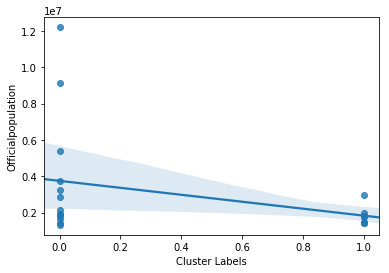

In [275]:
graph = sns.regplot(x=POI_agg_final['Cluster Labels'], y=POI_agg_final['Officialpopulation'], data=POI_agg_final)
graph

In [276]:
import numpy as np

parts = np.linspace(start=POI_agg_final['Officialpopulation'].min(), stop=POI_agg_final['Officialpopulation'].max(), num=kclusters)
len(parts)

2

In [282]:
def population_split(population):
    for i in range(0,len(parts)):
        if population <= parts[i]:
            radius = population/parts.max()*50
        else:
            radius = 0
    return radius

In [283]:
population_split(9000000)

36.89970030063416

In [284]:
def cluster_colour(cluster):
    if cluster != 0:
        colour = 'white'
    elif cluster != 1:
        colour = 'blue'
    elif cluster != 2:
        colour = 'green'
    elif cluster != 3:
        colour = 'yellow'
    elif cluster != 4:
        colour = 'red'
    else:
        colour = 'black'
    return colour

In [285]:
for row in POI_agg_final['Cluster Labels']:
    print(row)

0
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
1


In [286]:
for lat, lon, population, cluster, city in zip(POI_agg_final['lat'], POI_agg_final['lng'], POI_agg_final['Officialpopulation'], POI_agg_final['Cluster Labels'], POI_agg_final['City']):
    label = folium.Popup(city + ' ,Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = population_split(population),
        popup=label,
        color=cluster_colour(cluster),
        fill=True,
        fill_color=cluster_colour(cluster),
        fill_opacity=0.3).add_to(map)
    
map